## Loading and Preprocessing 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
df=pd.read_csv('CarPrice_Assignment.csv')  
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
# DATA EXPLORATION
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
df.shape

(205, 26)

In [18]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [20]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [21]:
df['CarName'].nunique()

147

In [22]:
df['CarName'].value_counts()


CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [23]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [24]:
df['fueltype'].nunique()

2

In [25]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [27]:
len(df)

205

In [29]:
len(df.CarName)

205

In [30]:
# DATA CLEANING
# checking for duplicates
df.duplicated().sum()

0

In [31]:
# missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
df.duplicated().sum()

0

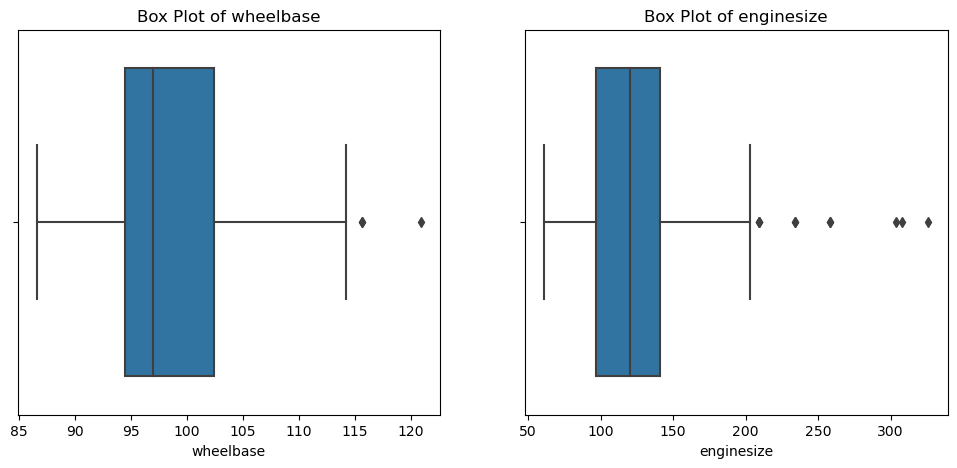

In [35]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['wheelbase'])
plt.title('Box Plot of wheelbase')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['enginesize'])
plt.title('Box Plot of enginesize')
plt.show()

In [ ]:
# Replace the value 0 in 'symboling' as NaN
df['symboling'].replace(0,np.nan)

In [39]:
# Renaming
df.rename(columns={'CarName': 'Car_Name'}, inplace=True)

In [40]:
df.head

<bound method NDFrame.head of      car_ID  symboling                  Car_Name fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [41]:
# DATA ENCODING
# ONE HOT ENCODING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder=OneHotEncoder()

In [45]:
df_encoded = pd.get_dummies(df, columns=['Car_Name','fueltype','stroke','doornumber'], drop_first=True)
print(df_encoded)

     car_ID  symboling aspiration      carbody drivewheel enginelocation  \
0         1          3        std  convertible        rwd          front   
1         2          3        std  convertible        rwd          front   
2         3          1        std    hatchback        rwd          front   
3         4          2        std        sedan        fwd          front   
4         5          2        std        sedan        4wd          front   
..      ...        ...        ...          ...        ...            ...   
200     201         -1        std        sedan        rwd          front   
201     202         -1      turbo        sedan        rwd          front   
202     203         -1        std        sedan        rwd          front   
203     204         -1      turbo        sedan        rwd          front   
204     205         -1      turbo        sedan        rwd          front   

     wheelbase  carlength  carwidth  carheight  ...  stroke_3.47 stroke_3.5  \
0       

In [48]:
# LABEL ENCODING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder = LabelEncoder()

In [50]:
df['stroke_encoded'] = label_encoder.fit_transform(df['stroke'])
df['doornumber_encoded'] = label_encoder.fit_transform(df['doornumber'])
print(df['stroke_encoded'])
print(df['doornumber_encoded'])

0       4
1       4
2      28
3      25
4      25
       ..
200    15
201    15
202     7
203    25
204    15
Name: stroke_encoded, Length: 205, dtype: int64
0      1
1      1
2      1
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: doornumber_encoded, Length: 205, dtype: int64


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [53]:
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(df[['price']])
df_standard_scaled = pd.DataFrame(standard_scaled, columns=['price'])
print(df_standard_scaled)

        price
0    0.027391
1    0.404461
2    0.404461
3    0.084485
4    0.523668
..        ...
200  0.447752
201  0.723810
202  1.029983
203  1.153582
204  1.173031

[205 rows x 1 columns]


In [54]:
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(df[['price']])
df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=['price'])
print(df_minmax_scaled)

        price
0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
..        ...
200  0.291123
201  0.345738
202  0.406311
203  0.430763
204  0.434611

[205 rows x 1 columns]


## Model Implementation

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = df.drop(columns='stroke')
y = df['stroke']
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio  compressionratio  ...  cylindernumber_three  \
0    0.074449   0.519071         -0.288349  ...             -0.070014   
1    0.074449   0.519071         -0.288349  ...             -0.070014   
2    0.604046  -2.404880         -0.288349  ...             -0.070014   
3   -0.431076  -0.517266         -0.035973  ...             -0.070014   
4    0.218885  -0.517266         -0.540725  ...             -0.070014   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0        

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [81]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

In [82]:
evaluate_model(LinearRegression(), "Linear Regression")


Linear Regression:
MSE: 3.5247339812359836e+25
MAE: 3197379176398.636
R²: -4.02573571304368e+26


In [83]:
evaluate_model(DecisionTreeRegressor(), "Decision Tree Regressor")


Decision Tree Regressor:
MSE: 4.390243902438967e-05
MAE: 0.0014634146341465269
R²: 0.9994985731757032


In [84]:
evaluate_model(RandomForestRegressor(), "Random Forest Regressor")


Random Forest Regressor:
MSE: 0.0002946520731707327
MAE: 0.005487804878049302
R²: 0.9966346641187661


In [85]:
evaluate_model(GradientBoostingRegressor(), "Gradient Boosting Regressor")


Gradient Boosting Regressor:
MSE: 0.00014653060945612762
MAE: 0.0029475451774922837
R²: 0.9983264169418687


In [88]:
evaluate_model(SVR(), "Support Vector Regressor")


Support Vector Regressor:
MSE: 0.04738485253356814
MAE: 0.1590209407871178
R²: 0.4587991771373282


## Model Evaluation 

In [ ]:
Linear Regression:
Extremely poor performance: Negative R² means the model performs worse than just predicting the mean.
Likely caused by:
Unscaled or poorly scaled features
Outliers
Multicollinearity
Data not being linearly separable


Decision Tree Regressor:
Excellent performance with R² = 0.9995, lowest MSE and MAE.
However, it may be overfitting,
especially if no depth or split constraints were applied.


Random Forest & Gradient Boosting:
Both perform very well, with high R² (> 0.99) and low errors.
Gradient Boosting slightly outperforms Random Forest in terms of:
Lower MSE (better accuracy)
Lower MAE (better prediction stability)
Higher R² (explains variance better)
    

Support Vector Regressor (SVR):
Weak performance with low R² (0.45) and highest errors (MSE & MAE).
SVR is very sensitive to feature scaling and hyperparameters, 
and doesn't perform well out-of-the-box for many datasets.



Best Performing Model: Gradient Boosting Regressor

R² Score: 0.9983 — explains nearly all variance in the data
MSE: 0.000146 — very low average squared error
MAE: 0.0029 — small average absolute prediction error



Gradient Boosting Regressor is the best model among the five due to its combination of high accuracy (R²),
low error (MSE & MAE), and generalization capability.    


## Feature Importance Analysis

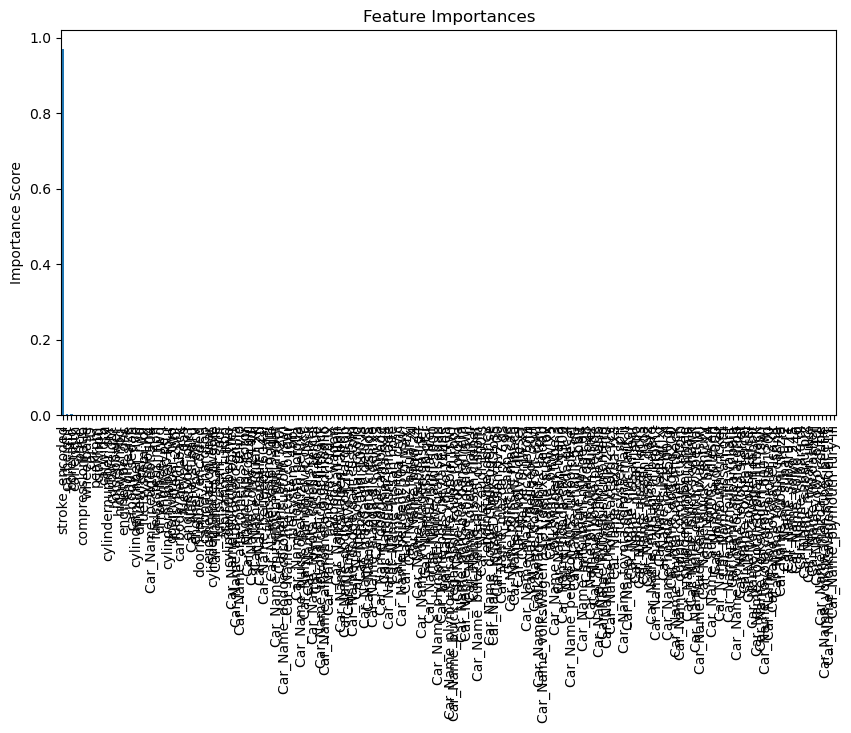

In [89]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
model = RandomForestRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.show()
